# LUS-CS433

in this notebook we explore deep learning solutions for our classification problem. Our goal is to train a binary classifier able to select relevant LUS images from a LUS video.
Note that code from this notebook is to a great extent taken from an official PyTorch tutorial: https://pytorch.org/tutorials/beginner/transfer_learning_tutorial.html

### Imports 

In [1]:
from __future__ import print_function, division

import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import torchvision
from torchvision import datasets, models, transforms
from encoders import CnnEncoder
import matplotlib.pyplot as plt
import time
import os
import copy
import cv2
import seaborn as sns
from cumulator import base
import sys

In [2]:
cumulator = base.Cumulator()

## 1. Transfer learning approach

TODO
In hope of reducing computing time, we aim at using transfer learning to train an LUS image binary classifier 

### 1.1 Loading Data

In [3]:
# Data augmentation and normalization for training
# Just normalization for validation

# TODO Do we need these augmentations ?

data_transforms = {
    'train': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'test': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

data_dir = 'data/butter_proc_images_similarity/'
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x),
                                          data_transforms[x])
                  for x in ['train', 'val', 'test']}
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=4,
                                             shuffle=True, num_workers=4)
              for x in ['train', 'val']}
dataloaders_test = torch.utils.data.DataLoader(image_datasets['test'], batch_size=1,
                                             shuffle=False, num_workers=4)
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val', 'test']}
class_names = image_datasets['train'].classes

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

FileNotFoundError: [Errno 2] No such file or directory: 'data/butter_proc_images_similarity/train'

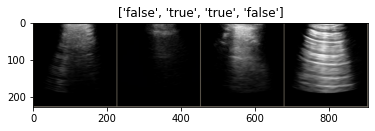

In [16]:
def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated


# Get a batch of training data
inputs, classes = next(iter(dataloaders['train']))

# Make a grid from batch
out = torchvision.utils.make_grid(inputs)

imshow(out, title=[class_names[x] for x in classes])

### 1.2 Model training

In [4]:
model_ft = models.resnet18(pretrained=True)
num_ftrs = model_ft.fc.in_features
# Here the size of each output sample is set to 2.
# Alternatively, it can be generalized to nn.Linear(num_ftrs, len(class_names)).
model_ft.fc = nn.Linear(num_ftrs, 2)

model_ft = model_ft.to(device)

criterion = nn.CrossEntropyLoss()

# Observe that all parameters are being optimized
optimizer_ft = optim.SGD(model_ft.parameters(), lr=0.001, momentum=0.9)

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)

NameError: name 'device' is not defined

In [19]:
cumulator.on()
model_ft = train_model(model_ft, criterion, optimizer_ft, exp_lr_scheduler,
                       num_epochs=25)
cumulator.off()

Epoch 0/24
----------
train Loss: 0.6312 Acc: 0.7087
val Loss: 1.8281 Acc: 0.5400

Epoch 1/24
----------
train Loss: 0.3619 Acc: 0.8638
val Loss: 1.1581 Acc: 0.5050

Epoch 2/24
----------
train Loss: 0.4082 Acc: 0.8538
val Loss: 2.1940 Acc: 0.5300

Epoch 3/24
----------
train Loss: 0.3610 Acc: 0.8762
val Loss: 3.0699 Acc: 0.5000

Epoch 4/24
----------
train Loss: 0.3497 Acc: 0.8613
val Loss: 2.7851 Acc: 0.5050

Epoch 5/24
----------
train Loss: 0.2392 Acc: 0.9150
val Loss: 6.8563 Acc: 0.5000

Epoch 6/24
----------
train Loss: 0.2540 Acc: 0.9100
val Loss: 6.0633 Acc: 0.5000

Epoch 7/24
----------
train Loss: 0.1315 Acc: 0.9437
val Loss: 0.1203 Acc: 0.9650

Epoch 8/24
----------
train Loss: 0.1406 Acc: 0.9375
val Loss: 0.0236 Acc: 0.9950

Epoch 9/24
----------
train Loss: 0.1490 Acc: 0.9413
val Loss: 0.0415 Acc: 0.9800

Epoch 10/24
----------
train Loss: 0.1482 Acc: 0.9425
val Loss: 0.0637 Acc: 0.9750

Epoch 11/24
----------
train Loss: 0.1229 Acc: 0.9525
val Loss: 0.6501 Acc: 0.7200

Ep

In [20]:
cumulator.total_carbon_footprint()

5.081305705159902

### 1.3 Model saving

In [21]:
torch.save(model_ft.state_dict(), "models/similarity/bright_matrix/09_12_resnet18_natural_500_85_95")

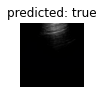

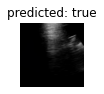

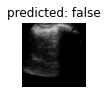

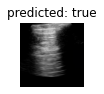

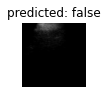

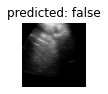

In [22]:
visualize_model(model_ft)

In [24]:
load_path = "models/similarity/bright_matrix/09_12_resnet18_natural_500_85_95"

# Loading model architecture
model_test = models.resnet18(pretrained=True)
num_ftrs = model_test.fc.in_features
model_test.fc = nn.Linear(num_ftrs, 2)

# Loading parameters to the model
model_test.load_state_dict(torch.load(load_path))
model_test = model_test.to(device)
model_test.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [35]:
imgs_path = [img[0] for img in dataloaders_test.dataset.imgs]

In [36]:
good_count = 0
avg_count = 0
bad_count = 0
write_path = "data/butter_proc_images_3/results_norandcrop"
for (img, _), path in zip(dataloaders_test, imgs_path) :
    img = img.to(device)
    prob_good = nn.functional.softmax(model_test(img), dim = 1)[0, 1]
    img_read = cv2.imread(path)
    img_name = os.path.split(path)[-1]
    folder = "average"
    if(prob_good >= 0.6) :
        folder = "good"
        good_count += 1
    elif(prob_good <= 0.2) :
        folder = "bad"
        bad_count += 1
    else :
        avg_count += 1
        
    #cv2.imwrite(f"{write_path}/{folder}/{img_name}", img_read)
print(f"There are {good_count} good, {avg_count} average and {bad_count} bad images.")

There are 65 good, 0 average and 0 bad images.


### Testing Encoder

In [3]:
data_transforms = {
    'train': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

data_dir = 'data/butter_proc_images_2'
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x),
                                          data_transforms[x])
                  for x in ['train', 'val']}
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=4,
                                             shuffle=True, num_workers=4)
              for x in ['train', 'val']}

dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val']}
class_names = image_datasets['train'].classes

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [13]:
inputs, classes = next(iter(dataloaders['train']))
inputs = inputs.to(device)

In [15]:
def cos_sim(vector1, vector2):
    """
    Compute the cosine similarity between two vectors of the same size
    """
    return np.dot(vector1,vector2)/(np.linalg.norm(vector1)*np.linalg.norm(vector2))

In [22]:
encoder = CnnEncoder()
encoded_imgs = encoder(inputs).detach()
cos_sim(encoded_imgs[0].reshape(-1), encoded_imgs[2].reshape(-1))

0.9870745

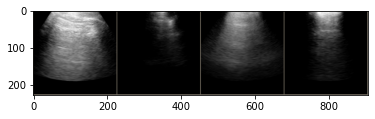

In [21]:
imshow(torchvision.utils.make_grid(inputs))